# CNN   small datasets 학습


- 딥러닝 모델은 대용량 데이터를 학습할 때 좋은 성능이 나온다. 그래서 학습할 Data가 적을 경우 좋은 성능을 내기가 어렵다.
  - 딥러닝은 **다양한 패턴의 많은 개수**의 데이터를 통해 feature engineering 과정 없이 원하는 문제를 해결하는 모델이다.
- Data가 많지 않아 학습에 어려움이 있을 때 사용 가능한 방법.
    1. **Data augmentation 활용**
        - 기존 데이터를 변경하여 데이터 개수를 늘린다.
        - 이미지의 경우 원본 이미지의 색깔, 각도 등을 약간씩 변형한 이미지들을 추가로 만들어 data의 수를 늘린다.
    2. **Pre-trained network의 활용**
        - 매우 큰 데이터셋으로 미리 Training한 모델의 파라미터(가중치)를 가져와서 풀려는 문제에 맞게 모델을 재보정해서 사용한다.
        - 성능이 좋은 학습된 모델을 사용하므로 적은 데이터에도 좋은 성능을 낼 수있다.

## Data for cats vs. dogs
- 2013년 Kaggle의 computer vision competition data 활용 https://www.kaggle.com/c/dogs-vs-cats/data
- 개와 고양이를 구분하기 위한 문제로 각 12,500개의 이미지를 포함
- Medium-resolution color JPEGs
- 25000장의 사진 중 4000장의 cats/dogs 사진(2000 cats, 2000 dogs) 만을 사용하여 학습하여 좋은 모형을 만들어 낼 수 있을까?
    - 학습: 2000, 검증: 1000, 테스트: 1000
    
![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

##### 이미지 다운로드
- gdown 패키지 : 구글 드라이브의 공유파일 다운로드 패키지    
- `pip install gdown`
- 코랩에는 설치 되어 있음.

In [ ]:
!pip install gdown --upgrade

In [1]:
import gdown
from zipfile import ZipFile
import os
print(gdown.__version__)

4.7.3


In [8]:
def down_extract(down_path='data/cats_and_dogs_small'):

    url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
    fname = 'cats_and_dogs_small.zip'   # 다운받아서 저장할 파일 이름.
    # 다운로드
    gdown.download(url, fname, quiet=False)
    # 압축풀기
    with ZipFile(fname) as zipFile: # 압축파일의 경로를 넣어서  ZipFile 객체 생성
        zipFile.extractall(down_path)  # 압축 풀 디렉토리 넣어서 실행.

4.7.3


In [ ]:
down_extract()

# 하이퍼파라미터 정의

In [ ]:
LEARNING_RATE = 0.001
N_EPOCH = 10 # 200
N_BATCH = 64

## 모델 구현 및 학습

- Input: $224 \times 224$ 픽셀의 RGB layer
- Output: cat or dog (binary classification)  
- ImageDataGenerator를 이용해 파일시스템에 저장된 이미지 데이터셋을 학습시킨다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import random

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
def get_model():

    dropout_rate = 0.3
    model = keras.Sequential()

    model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D(padding='same'))

    model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(padding='same'))

    model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(padding='same'))

    model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(padding='same'))

    model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(padding='same'))

    model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(padding='same'))

    model.add(layers.Flatten())

    # output layer - 다중분류
    model.add(layers.Dense(units=2, activation='softmax', name='output'))

    model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ImageDataGenerator 생성

In [ ]:
# 데이터셋 디렉토리 경로
trainset_dir = 'data/cats_and_dogs_small/train'
valset_dir = 'data/cats_and_dogs_small/validation/'
testset_dir = 'data/cats_and_dogs_small/test/'

In [ ]:
# image augmentation 적용하지 않음.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Iterator 생성->raw data파일과 연결.
train_iter = train_datagen.flow_from_directory(trainset_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=N_BATCH
                                               )

val_iter = val_datagen.flow_from_directory(valset_dir, target_size=(224, 224), class_mode='categorical', batch_size=N_BATCH)
test_iter = test_datagen.flow_from_directory(testset_dir, target_size=(224, 224), class_mode='categorical', batch_size=N_BATCH)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
print("==class index-class name확인")
print(train_iter.class_indices)

==class index-class name확인
{'cats': 0, 'dogs': 1}


In [ ]:
print('==에폭당 step 수')
print(len(train_iter), len(val_iter), len(test_iter))

==에폭당 step 수
32 16 16



##  Model Training(학습)

In [ ]:
g_drive_path = '/content/drive/MyDrive/my_model'
save_dir_path = os.path.join(g_drive_path, 'saved_model', 'cat_dog_model_no_aug')

save_weight_path = os.path.join(save_dir_path, 'ckpt')

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_weight_path,
                                              save_weights_only=True,# 파라미터만 저장
                                              save_best_only=True,
                                              monitor='val_loss',
                                              verbose=1)

es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
model = get_model()
hist = model.fit(train_iter,    # trainset으로 iterator 지정. (X, y)
                 epochs=N_EPOCH,
                 steps_per_epoch=len(train_iter), # train 1 epoch당 step수
                 validation_data=val_iter,  # 검증 데이터셋 지정.
                 validation_steps=len(val_iter), # step 수
                 callbacks=[mc_callback, es_callback]
                 )

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.7012 - accuracy: 0.4880
Epoch 1: val_loss improved from inf to 0.69311, saving model to /content/drive/MyDrive/my_model/saved_model/cat_dog_model_no_aug/ckpt
32/32 [==============================] - 22s 395ms/step - loss: 0.7012 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5095
Epoch 2: val_loss improved from 0.69311 to 0.68948, saving model to /content/drive/MyDrive/my_model/saved_model/cat_dog_model_no_aug/ckpt
32/32 [==============================] - 8s 259ms/step - loss: 0.6925 - accuracy: 0.5095 - val_loss: 0.6895 - val_accuracy: 0.5530
Epoch 3/10
31/32 [============================>.] - ETA: 0s - loss: 0.6926 - accuracy: 0.5207
Epoch 3: val_loss did not improve from 0.68948
32/32 [==============================] - 9s 272ms/step - loss: 0.6926 - accuracy: 0.5205 - val_loss: 0.6924 - val_accuracy: 0.5120
Epoch

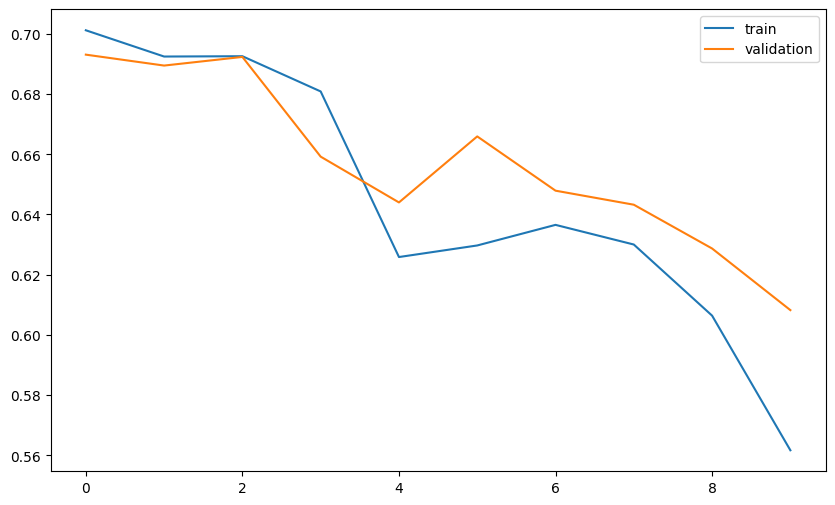

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hist.epoch, hist.history['loss'], label='train')
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.legend()
plt.show()

##### 저장된 모델 조회

In [ ]:
# 모델 생성
saved_model1 = get_model()
saved_model1.evaluate(test_iter)

16/16 [==============================] - 3s 157ms/step - loss: 0.6930 - accuracy: 0.4980


[0.6930402517318726, 0.49799999594688416]

In [ ]:
# 새로 생성된 모델에 저장 best wegith 덮어씌우기
saved_model1.load_weights(save_weight_path)

saved_model1.evaluate(test_iter)

16/16 [==============================] - 3s 159ms/step - loss: 0.6222 - accuracy: 0.6670


[0.6221778392791748, 0.6669999957084656]

# 새로운 데이터 추론

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_preprocessing(image_path):
    """
    경로의 이미지를 읽어서 전처리(scaling) 한 뒤 반환.
    [Parameter]
       image_path: str - 변환할 이미지 경로(Path)
    [Return]
       ndarray: 전처리한 이미지
    """
    raw_img = load_img(image_path, target_size=(224,224))
    img_array = img_to_array(raw_img) # PIL ImageFile -> ndarray (224, 224, 3)
    img_array = img_array[np.newaxis, ...] # 3차원-4차원 (224,224,3)=>(1, 224,224,3)
    img_array = img_array.astype('float32')/255 # 전처리. float32변환, /225 (scaling)
    return img_array

In [ ]:
img = load_preprocessing("img/a.jpg")
pred = model.predict(img)
result = result_postprocessing(pred)

In [ ]:
def result_postprocessing(pred):
    """
    모델이 추론한 결과를 받아서 결과 문자열을 만들어 반환

    [Parameter]
        pred: ndarray - 모델 추론 결과. idx 0: 고양이 확률, 1: 개 확률
    [Return]
        str: 결과 후처리. 형식: "label: 0, name: cats, 확률: 0.8"

    """
    index2classname = np.array([k for k in train_iter.class_indices.keys()])
    label = np.argmax(pred, axis=-1)
    prob = np.max(pred, axis=-1)
    label_name = index2classname[label]
    return f"label: {label}, name: {label_name}, 확률: {prob}"

In [ ]:
new_img_path = 'dog.jpg'
new_img_path = 'cat.jpg'
new_X = load_preprocessing(new_img_path)

pred = saved_model1.predict(new_X)
print(pred)
print(result_postprocessing(pred))

# Image data augmentation 사용

- 학습 이미지의 수가 적어서 overfitting이 발생할 가능성을 줄이기 위해 기존 훈련 데이터로부터 그럴듯하게 이미지 변환을 통해서 이미지(데이터)를 늘리는 작업을 Image augmentation
- train_set에만 적용, validation, test set에는 적용하지 않는다. (rescaling만 한다.)

##### ImageDataGenerator 생성

In [ ]:
# 데이터셋 디렉토리 경로
trainset_dir = 'data/cats_and_dogs_small/train'
valset_dir = 'data/cats_and_dogs_small/validation/'
testset_dir = 'data/cats_and_dogs_small/test/'

In [ ]:
# Image Augmentation 적용.
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='constant')

val_datagen2 = ImageDataGenerator(rescale=1./255)
test_datagen2 = ImageDataGenerator(rescale=1./255)

In [ ]:
train_iter2 = train_datagen2.flow_from_directory(trainset_dir, target_size=(224,224), class_mode='categorical', batch_size=N_BATCH)

val_iter2 = val_datagen2.flow_from_directory(valset_dir, target_size=(224,224), class_mode='categorical', batch_size=N_BATCH)

test_iter2 = test_datagen2.flow_from_directory(testset_dir, target_size=(224,224), class_mode='categorical', batch_size=N_BATCH)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


##### 모델 생성, 컴파일, 학습

In [ ]:
g_drive_path = '/content/drive/MyDrive/my_model'
save_dir_path_aug = os.path.join(g_drive_path, "saved_model", "cat_dog_model_aug")
mc_callback2 = keras.callbacks.ModelCheckpoint(save_dir_path_aug, save_best_only=True, monitor='val_loss', verbose=1)
es_callback2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)


model2 = get_model()

hist2 = model2.fit(train_iter2, epochs=200,
                   steps_per_epoch=len(train_iter2),
                   validation_data=val_iter2,
                   validation_steps=len(val_iter2),
                   callbacks=[mc_callback2, es_callback2])

Epoch 1/200
32/32 [==============================] - ETA: 0s - loss: 0.6969 - accuracy: 0.4910
Epoch 1: val_loss improved from inf to 0.69221, saving model to /content/drive/MyDrive/my_model/saved_model/cat_dog_model_aug
32/32 [==============================] - 29s 845ms/step - loss: 0.6969 - accuracy: 0.4910 - val_loss: 0.6922 - val_accuracy: 0.5060
Epoch 2/200
32/32 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5270
Epoch 2: val_loss did not improve from 0.69221
32/32 [==============================] - 26s 818ms/step - loss: 0.6933 - accuracy: 0.5270 - val_loss: 0.6931 - val_accuracy: 0.4910
Epoch 3/200
32/32 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5380
Epoch 3: val_loss did not improve from 0.69221
32/32 [==============================] - 26s 820ms/step - loss: 0.6892 - accuracy: 0.5380 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5250
Epoc

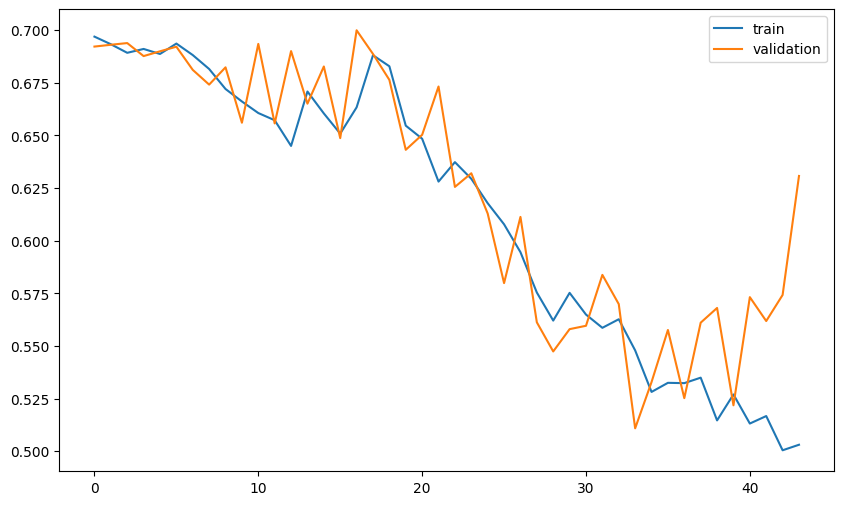

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hist2.epoch, hist2.history['loss'], label='train')
plt.plot(hist2.epoch, hist2.history['val_loss'], label='validation')
plt.legend()
plt.show()

##### 저장된 모델 Loading 후 평가(사용)

##### 새로운데이터 추론

In [ ]:
saved_model2 = models.load_model(save_dir_path_aug)
saved_model2.evaluate(test_iter2)

16/16 [==============================] - 3s 153ms/step - loss: 0.5400 - accuracy: 0.7320


[0.5399696230888367, 0.7319999933242798]

In [ ]:
# img_path = 'dog.jpg'
img_path = 'cat_3.jpg'
# img_path = "https://newsimg.hankookilbo.com/2015/12/17/201512171111528240_2.jpg"
data2 = load_preprocessing(img_path)
# data.shape
pred2 = saved_model2.predict(data2)
print(pred2.shape)
print(pred2)
print(result_postprocessing(pred2))

1/1 [==============================] - 0s 19ms/step
(1, 2)
[[0.6653326  0.33466738]]
label: [0], name: ['cats'], 확률: [0.6653326]
